In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
divorce = pd.read_csv('divorce.csv')
print(divorce.info())
print(divorce.isna().sum())
print(divorce.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209 entries, 0 to 2208
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   divorce_date       2209 non-null   object 
 1   dob_man            2209 non-null   object 
 2   education_man      2205 non-null   object 
 3   income_man         2209 non-null   float64
 4   dob_woman          2209 non-null   object 
 5   education_woman    2209 non-null   object 
 6   income_woman       2209 non-null   float64
 7   marriage_date      2209 non-null   object 
 8   marriage_duration  2209 non-null   float64
 9   num_kids           1333 non-null   float64
dtypes: float64(4), object(6)
memory usage: 172.7+ KB
None
divorce_date           0
dob_man                0
education_man          4
income_man             0
dob_woman              0
education_woman        0
income_woman           0
marriage_date          0
marriage_duration      0
num_kids             876
dtype: i

In [4]:
# Import divorce.csv, parsing the appropriate columns as dates in the import
divorce = pd.read_csv('divorce.csv', parse_dates=['divorce_date','dob_man','dob_woman'])
print(divorce.dtypes)

divorce_date         datetime64[ns]
dob_man              datetime64[ns]
education_man                object
income_man                  float64
dob_woman            datetime64[ns]
education_woman              object
income_woman                float64
marriage_date                object
marriage_duration           float64
num_kids                    float64
dtype: object


In [5]:
# Ex 2.1
# Convert the marriage_date column to DateTime values
divorce["marriage_date"] = pd.to_datetime(divorce['marriage_date'])
print(divorce.dtypes)

divorce_date         datetime64[ns]
dob_man              datetime64[ns]
education_man                object
income_man                  float64
dob_woman            datetime64[ns]
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
dtype: object


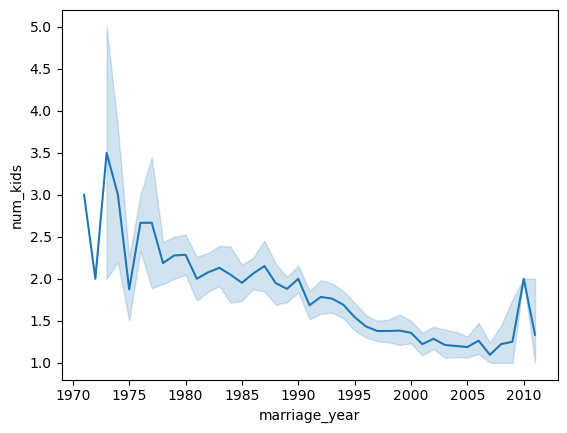

In [6]:
# Ex 2.2 & 2.3
# Define the marriage_year column
divorce["marriage_year"] = divorce["marriage_date"].dt.year

# Create a line plot showing the average number of kids by year
sns.lineplot(data=divorce, x='marriage_year', y='num_kids')
plt.show()

In [7]:
print(divorce['divorce_date'].min())
print(divorce['divorce_date'].max())

2000-01-08 00:00:00
2015-11-03 00:00:00


In [8]:
divorce.corr(numeric_only = True)

,income_man,income_woman,marriage_duration,num_kids,marriage_year
income_man,1.000000,0.318047,0.085321,0.040848,0.019170
income_woman,0.318047,1.000000,0.078677,-0.018015,0.026433
marriage_duration,0.085321,0.078677,1.000000,0.447358,-0.812469
num_kids,0.040848,-0.018015,0.447358,1.000000,-0.461495
marriage_year,0.019170,0.026433,-0.812469,-0.461495,1.000000


<Axes: >

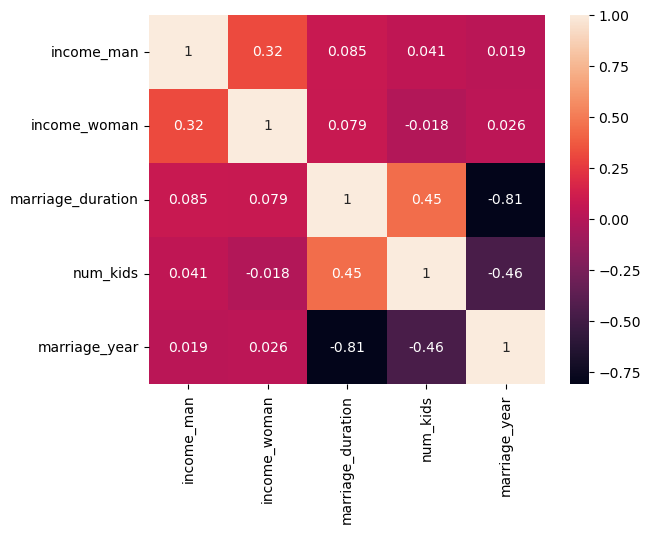

In [9]:
sns.heatmap(divorce.corr(numeric_only = True), annot=True)

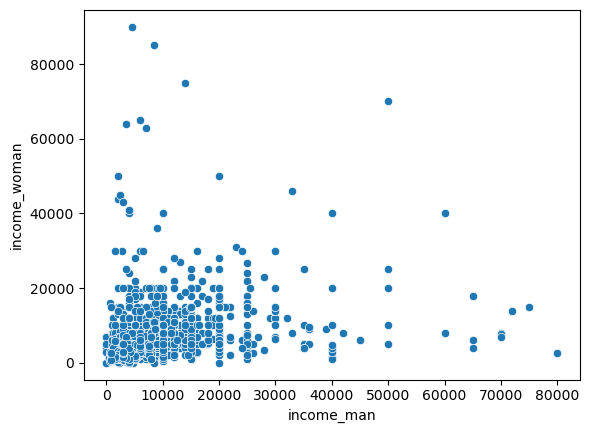

In [10]:
sns.scatterplot(data=divorce, x='income_man', y='income_woman')
plt.show()

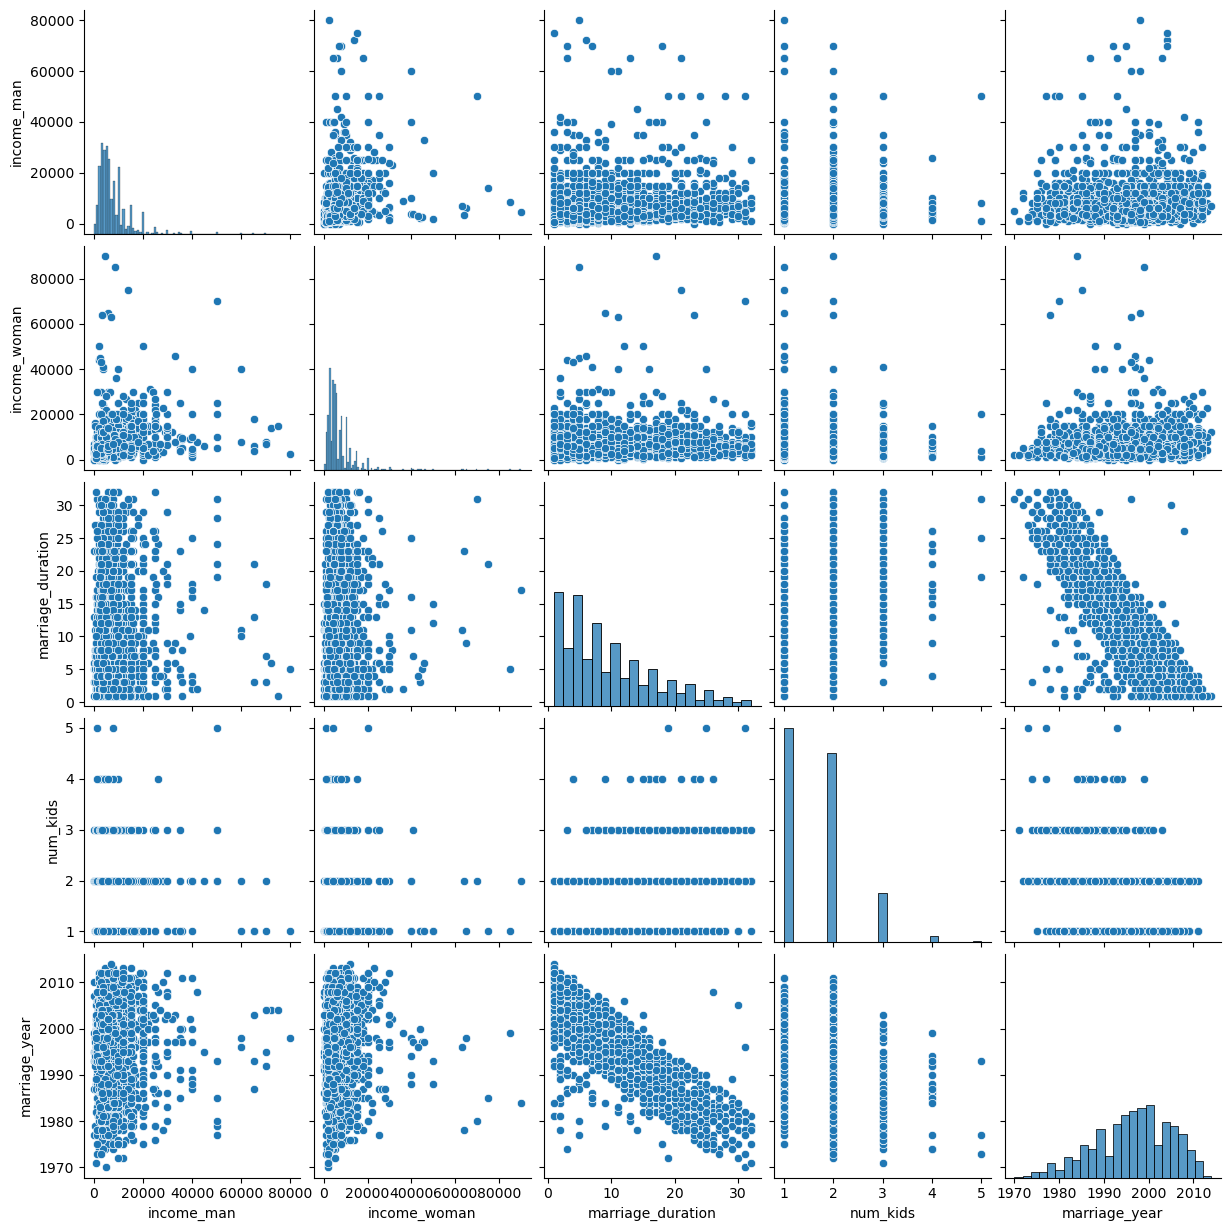

In [11]:
sns.pairplot(data=divorce)
plt.show()

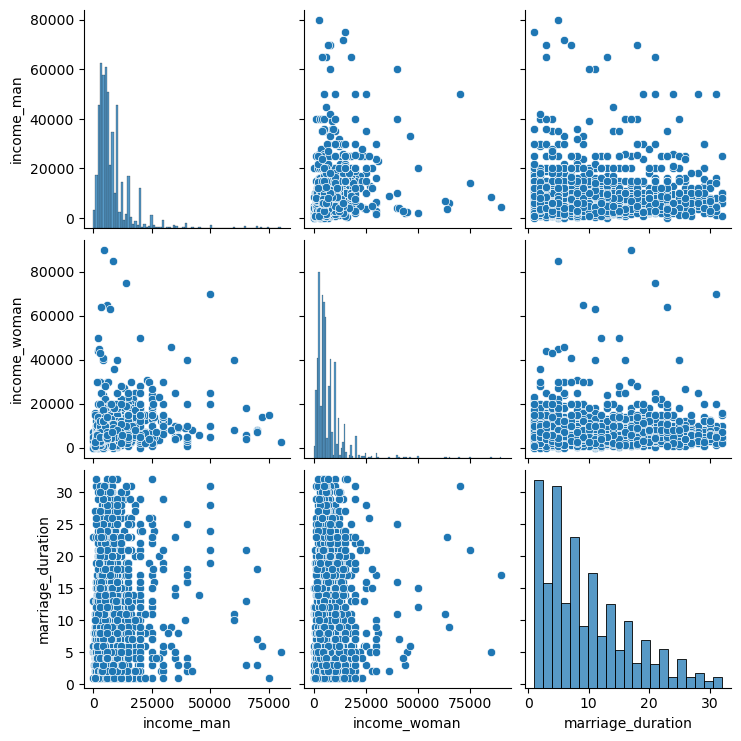

In [12]:
sns.pairplot(data=divorce, vars = ['income_man','income_woman','marriage_duration'])
plt.show()

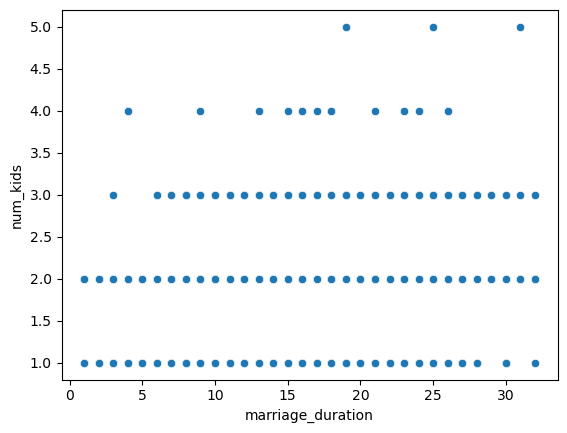

In [13]:
# Ex3
# Create the scatterplot
sns.scatterplot(data=divorce, x='marriage_duration', y='num_kids')
plt.show()

divorce_date           0
dob_man                0
education_man          4
income_man             0
dob_woman              0
education_woman        0
income_woman           0
marriage_date          0
marriage_duration      0
num_kids             876
marriage_year          0
num_kids_temp          0
dtype: int64
divorce_date           0
dob_man                0
education_man          4
income_man             0
dob_woman              0
education_woman        0
income_woman           0
marriage_date          0
marriage_duration      0
num_kids             876
marriage_year          0
num_kids_temp          0
dtype: int64


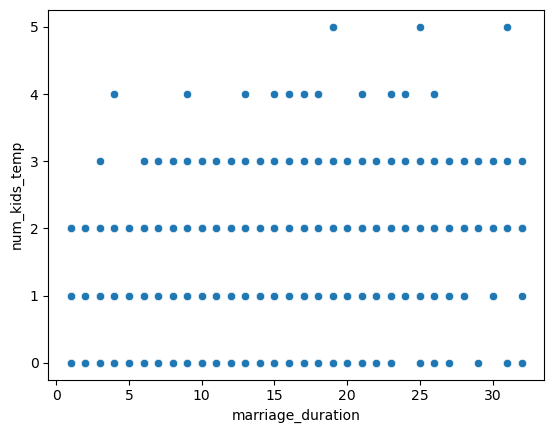

In [16]:
print(divorce.isna().sum())
divorce['num_kids_temp'] = divorce['num_kids'].fillna(0)
print(divorce.isna().sum())
sns.scatterplot(data=divorce, x='marriage_duration', y='num_kids_temp')
plt.show()

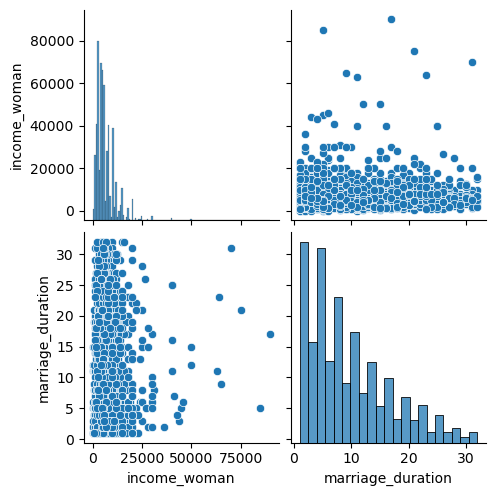

In [19]:
# Ex4
# Create a pairplot for income_woman and marriage_duration
sns.pairplot(data=divorce, vars = ['income_woman', 'marriage_duration'])
plt.show()

In [20]:
divorce['education_man'].value_counts()

education_man
Professional    1313
Preparatory      501
Secondary        288
Primary          100
Other              3
Name: count, dtype: int64

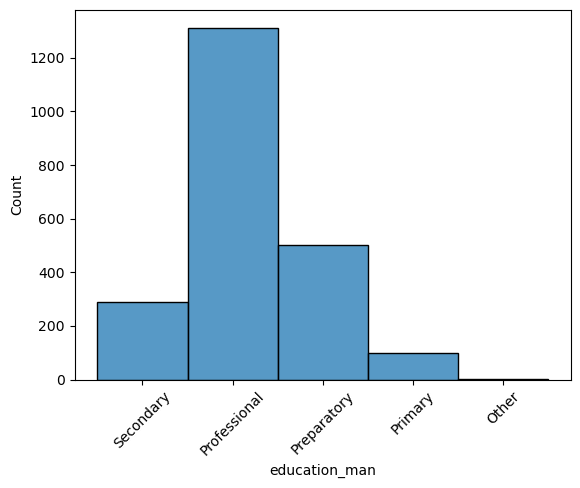

In [21]:
sns.histplot(data=divorce, x='education_man', binwidth = 1)
plt.xticks(rotation=45)
plt.show()

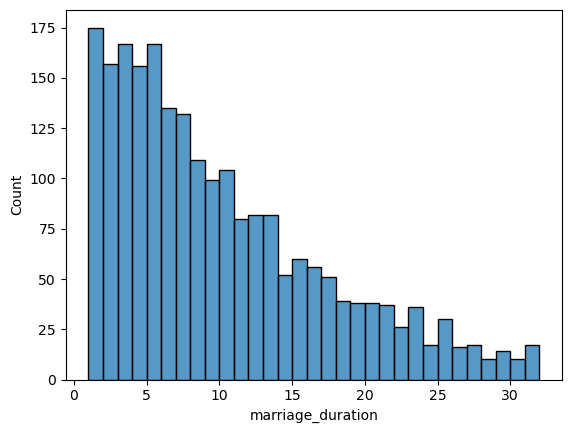

In [22]:
sns.histplot(data=divorce, x='marriage_duration', binwidth = 1)
plt.show()

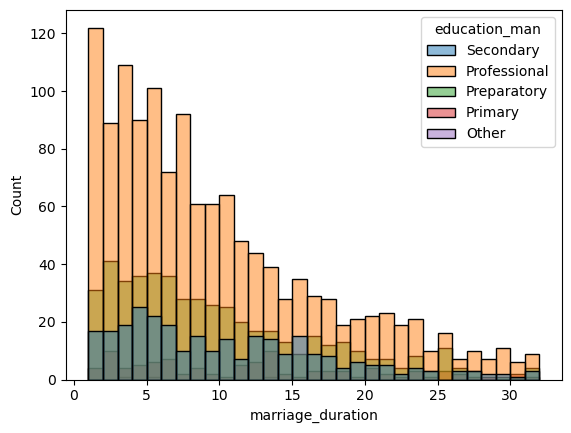

In [23]:
sns.histplot(data=divorce, x='marriage_duration', hue = 'education_man', binwidth = 1)
plt.show()

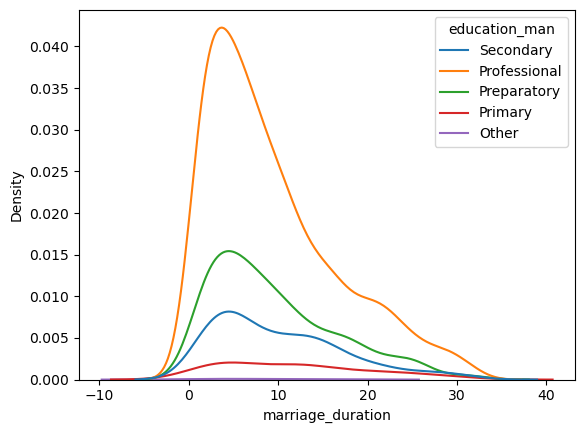

In [25]:
sns.kdeplot(data=divorce, x='marriage_duration', hue = 'education_man')
plt.show()

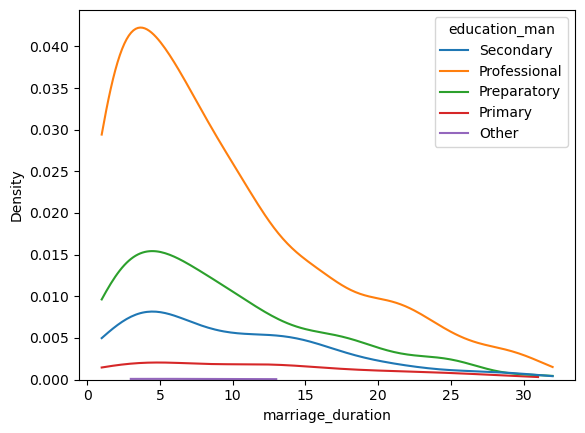

In [27]:
#sns.kdeplot(data=divorce, x='marriage_duration', hue = 'education_man', cut = 0)
sns.kdeplot(data=divorce, x=divorce['marriage_duration'], hue = divorce['education_man'], cut = 0)
plt.show()

In [28]:
divorce['man_age_marriage'] = divorce['marriage_year'] - divorce['dob_man'].dt.year
print(divorce[['man_age_marriage','marriage_year','dob_man']]) 

      man_age_marriage  marriage_year    dob_man
0                   25           2000 1975-12-18
1                   25           2001 1976-11-17
2                   31           2000 1969-04-06
3                   27           2006 1979-11-13
4                   25           2007 1982-09-20
...                ...            ...        ...
2204                33           2002 1969-11-27
2205                32           2002 1970-09-17
2206                33           2009 1976-03-11
2207                31           2008 1977-10-29
2208                49           2009 1960-06-22

[2209 rows x 3 columns]


In [29]:
divorce['woman_age_marriage'] = divorce['marriage_year'] - divorce['dob_woman'].dt.year
print(divorce['woman_age_marriage'])

0       17
1       24
2       30
3       25
4       19
        ..
2204    27
2205    25
2206    31
2207    30
2208    37
Name: woman_age_marriage, Length: 2209, dtype: int32


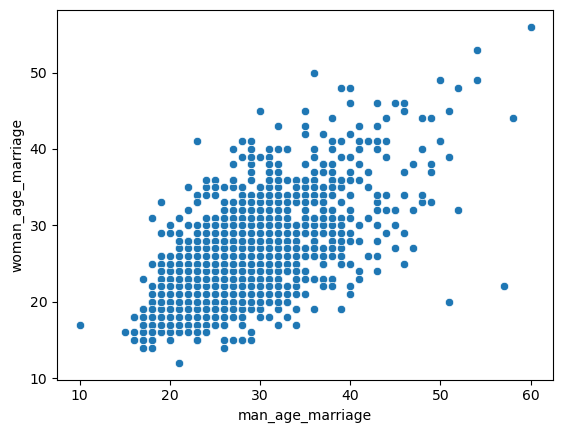

In [30]:
sns.scatterplot(data=divorce, x ='man_age_marriage', y = 'woman_age_marriage')
plt.show()

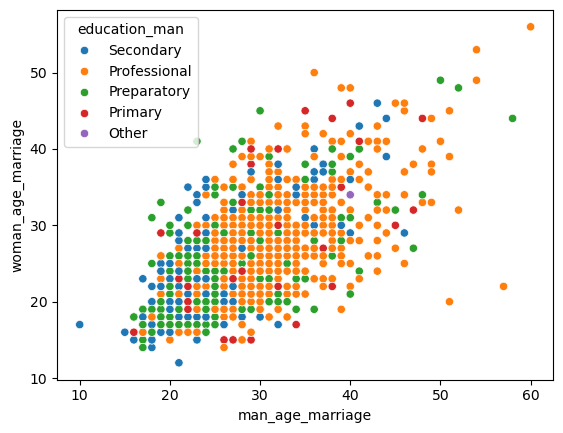

In [31]:
sns.scatterplot(data=divorce, x ='man_age_marriage', y = 'woman_age_marriage', hue = 'education_man')
plt.show()

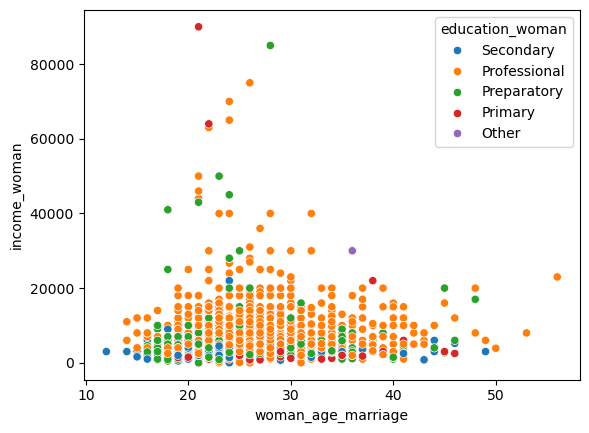

In [32]:
# Ex5
# Create the scatter plot
sns.scatterplot(data=divorce, x='woman_age_marriage', y='income_woman', hue='education_woman')
plt.show()

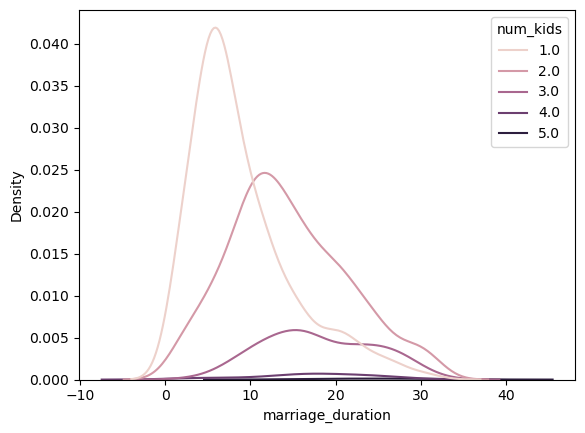

In [15]:
# Ex6
# Create the KDE plot
sns.kdeplot(data=divorce, x='marriage_duration', hue = 'num_kids')
plt.show()

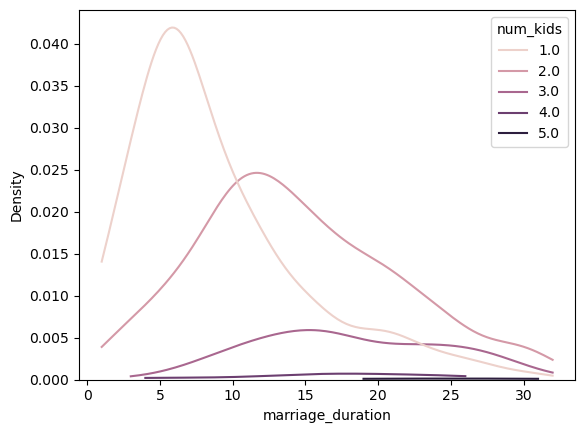

In [16]:
# Create the KDE plot
sns.kdeplot(data=divorce, x='marriage_duration', hue = 'num_kids', cut = 0)
plt.show()

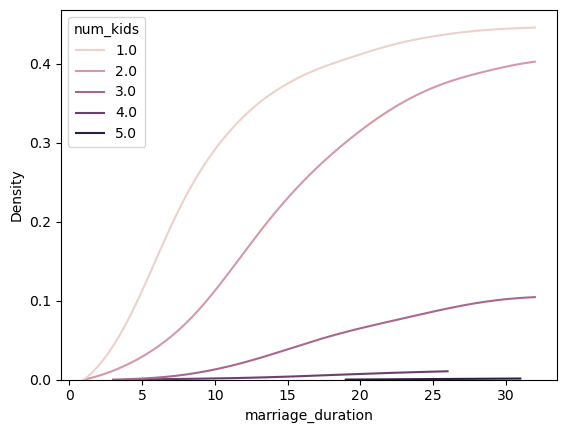

In [21]:
# Create the KDE plot
sns.kdeplot(data=divorce, x='marriage_duration', hue = 'num_kids', cumulative = True, cut = 0)
plt.show()

In [34]:
planes = pd.read_csv('Airlines_unclean.csv', index_col = 0)
planes['Destination'].value_counts()

Destination
Cochin       4391
Banglore     2773
Delhi        1219
New Delhi     888
Hyderabad     673
Kolkata       369
Name: count, dtype: int64

In [35]:
planes['Destination'].value_counts(normalize=True)

Destination
Cochin       0.425773
Banglore     0.268884
Delhi        0.118200
New Delhi    0.086105
Hyderabad    0.065257
Kolkata      0.035780
Name: proportion, dtype: float64

In [36]:
pd.crosstab(planes['Source'], planes['Destination'])

Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Source,,,,,,
Banglore,0,0,1199,0,0,868
Chennai,0,0,0,0,364,0
Delhi,0,4318,0,0,0,0
Kolkata,2720,0,0,0,0,0
Mumbai,0,0,0,662,0,0


In [39]:
pd.crosstab(planes['Source'], planes['Destination'], values=planes['Price'], aggfunc = 'median')

Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Source,,,,,,
Banglore,NaN,NaN,4823.0,NaN,NaN,10976.5
Chennai,NaN,NaN,NaN,NaN,3850.0,NaN
Delhi,NaN,10262.0,NaN,NaN,NaN,NaN
Kolkata,9345.0,NaN,NaN,NaN,NaN,NaN
Mumbai,NaN,NaN,NaN,3342.0,NaN,NaN


In [46]:
planes.groupby(['Source','Destination']).median(numeric_only = True)

Price
Source   Destination         
Banglore Delhi         4823.0
         New Delhi    10976.5
Chennai  Kolkata       3850.0
Delhi    Cochin       10262.0
Kolkata  Banglore      9345.0
Mumbai   Hyderabad     3342.0

In [22]:
salaries = pd.read_csv('Salary_Rupee_USD.csv', index_col = 0)
print(salaries.info())

# Ex7
print(salaries['Job_Category'].value_counts(normalize = True))

<class 'pandas.core.frame.DataFrame'>
Index: 407 entries, 0 to 406
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Working_Year          407 non-null    int64  
 1   Designation           407 non-null    object 
 2   Experience            407 non-null    object 
 3   Employment_Status     407 non-null    object 
 4   Salary_In_Rupees      407 non-null    float64
 5   Employee_Location     407 non-null    object 
 6   Company_Location      407 non-null    object 
 7   Company_Size          407 non-null    object 
 8   Remote_Working_Ratio  407 non-null    int64  
 9   Salary_USD            407 non-null    float64
 10  Job_Category          407 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 38.2+ KB
None
Job_Category
Data Science        0.277641
Data Engineering    0.272727
Data Analytics      0.226044
Machine Learning    0.120393
Other               0.068796
Managerial 

In [23]:
salaries.head()

,Working_Year,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio,Salary_USD,Job_Category
0,2020,Machine Learning Scientist,SE,FT,20700000.0,JP,JP,S,0,248256.840,Machine Learning
1,2020,Big Data Engineer,SE,FT,8680000.0,GB,GB,M,50,104099.820,Data Engineering
2,2020,Product Data Analyst,MI,FT,1590000.0,HN,HN,S,0,19096.680,Data Analytics
3,2020,Machine Learning Engineer,SE,FT,11900000.0,US,US,L,50,143225.100,Machine Learning
4,2020,Data Analyst,EN,FT,5730000.0,US,US,L,100,68748.048,Data Analytics


In [48]:
# Ex 8

# Cross-tabulate Company_Size and Experience
print(pd.crosstab(salaries["Company_Size"], salaries["Experience"]))

Experience    EN  EX  MI   SE
Company_Size                 
L             24   7  49   44
M             25   9  58  136
S             18   1  21   15


In [49]:
# Ex 8.2

# Cross-tabulate Job_Category and Company_Size
print(pd.crosstab(salaries["Job_Category"], salaries["Company_Size"]))

Company_Size       L   M   S
Job_Category                
Data Analytics    23  61   8
Data Engineering  28  72  11
Data Science      38  59  16
Machine Learning  17  19  13
Managerial         5   8   1
Other             13   9   6


In [50]:
# Ex 8.3
# Cross-tabulate Job_Category and Company_Size
print(pd.crosstab(salaries["Job_Category"], salaries["Company_Size"],
            values=salaries["Salary_USD"], aggfunc="mean"))

Company_Size                  L              M             S
Job_Category                                                
Data Analytics    112851.749217   95912.685246  53741.877000
Data Engineering  118939.035000  121287.060500  86927.136000
Data Science       96489.520105  116044.455864  62241.749250
Machine Learning  140779.491529  100794.236842  78812.586462
Managerial        190551.448800  150713.628000  31484.700000
Other              92873.911385   89750.578667  69871.248000


In [51]:
planes = pd.read_csv('Airlines_unclean.csv', index_col = 0)
planes.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,9/6/2019,Delhi,Cochin,DEL → LKO → BOM → COK,9:25,10/6/2023 4:25,19h,2 stops,No info,13882.0
1,IndiGo,12/5/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
2,IndiGo,1/3/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
3,SpiceJet,24/6/2019,Kolkata,Banglore,CCU → BLR,9:00,11:25,2h 25m,non-stop,No info,3873.0
4,Jet Airways,12/3/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,13/3/2023 10:25,15h 30m,1 stop,In-flight meal not included,11087.0


Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                  float64
Total_Stops                object
Additional_Info            object
Price                     float64
dtype: object


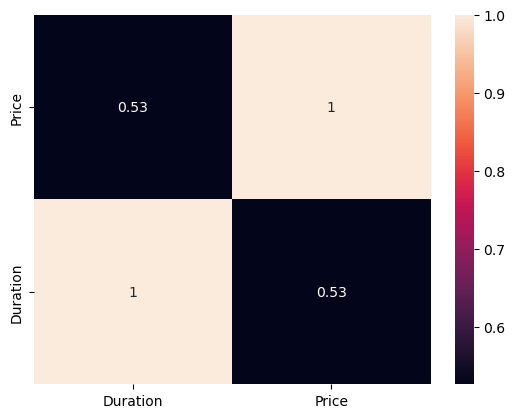

In [83]:
#Generating New Features
planes = pd.read_csv('Airlines_unclean.csv', index_col = 0, parse_dates=['Date_of_Journey','Dep_Time','Arrival_Time'],date_format = "%d/%m/%Y")
# Remove the string character
planes["Duration"] = planes["Duration"].str.replace("h", ".")
planes["Duration"] = planes["Duration"].str.replace("m", "")
planes["Duration"] = planes["Duration"].str.replace(" ", "")
# Convert to float data type
planes["Duration"] = planes["Duration"].astype(float)
print(planes.dtypes)
ax = sns.heatmap(planes.corr(numeric_only = True), annot=True)
ax.set_ylim([0,2])
plt.show()

In [84]:
planes.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,9:25,10/6/2023 4:25,19.00,2 stops,No info,13882.0
1,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5.25,1 stop,No info,6218.0
2,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4.45,1 stop,No info,13302.0
3,SpiceJet,2019-06-24,Kolkata,Banglore,CCU → BLR,9:00,11:25,2.25,non-stop,No info,3873.0
4,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,18:55,13/3/2023 10:25,15.30,1 stop,In-flight meal not included,11087.0


In [85]:
#remove Nan values
threshold = len(planes) * 0.05
print(threshold)
# Count the number of missing values in each column
print(planes.isna().sum())

# Find the five percent threshold
threshold = len(planes) * 0.05

# Create a filter
cols_to_drop = planes.columns[planes.isna().sum() <= threshold]

# Drop missing values for columns below the threshold
planes.dropna(subset=cols_to_drop, inplace=True)

print(planes.isna().sum())

#planes = planes.drop(columns = ['Additional_Info'])

# Calculate median plane ticket prices by Airline
airline_prices = planes.groupby("Airline")["Price"].median()
print(airline_prices)
print('============================================')

# Convert to a dictionary
prices_dict = airline_prices.to_dict()
print(prices_dict)
print('============================================')

# Map the dictionary to missing values of Price by Airline
planes["Price"] = planes["Price"].fillna(planes["Airline"].map(prices_dict))

# Check for missing values
print(planes.isna().sum())

533.0
Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64
Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price              368
dtype: int64
Airline
Air Asia              5192.0
Air India             9443.0
GoAir                 5003.5
IndiGo                5054.0
Jet Airways          11507.0
Multiple carriers    10197.0
SpiceJet              3873.0
Vistara               8028.0
Name: Price, dtype: float64
{'Air Asia': 5192.0, 'Air India': 9443.0, 'GoAir': 5003.5, 'IndiGo': 5054.0, 'Jet Airways': 11507.0, 'Multiple carriers': 10197.0, 'SpiceJet': 3873.0, 'Vistara': 8028.0}
Airline              0
D

In [86]:
planes.isna().sum()

Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price                0
dtype: int64

In [87]:
print(planes['Total_Stops'].value_counts())
print(planes.info())

Total_Stops
1 stop      4467
non-stop    2786
2 stops     1219
3 stops       35
4 stops        1
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 8508 entries, 0 to 10659
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          8508 non-null   object        
 1   Date_of_Journey  8508 non-null   datetime64[ns]
 2   Source           8508 non-null   object        
 3   Destination      8508 non-null   object        
 4   Route            8508 non-null   object        
 5   Dep_Time         8508 non-null   object        
 6   Arrival_Time     8508 non-null   object        
 7   Duration         8508 non-null   float64       
 8   Total_Stops      8508 non-null   object        
 9   Additional_Info  8208 non-null   object        
 10  Price            8508 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 797.6+ KB
None


In [88]:
planes['Total_Stops'] = planes['Total_Stops'].str.replace(' stops', '')
planes['Total_Stops'] = planes['Total_Stops'].str.replace(' stop', '')
planes['Total_Stops'] = planes['Total_Stops'].str.replace('non-stop', '0')

planes['Total_Stops'] = planes['Total_Stops'].str.replace(' ', '')
print(planes.head())



       Airline Date_of_Journey    Source Destination                  Route  \
0  Jet Airways      2019-06-09     Delhi      Cochin  DEL → LKO → BOM → COK   
1       IndiGo      2019-05-12   Kolkata    Banglore        CCU → NAG → BLR   
2       IndiGo      2019-03-01  Banglore   New Delhi        BLR → NAG → DEL   
3     SpiceJet      2019-06-24   Kolkata    Banglore              CCU → BLR   
4  Jet Airways      2019-03-12  Banglore   New Delhi        BLR → BOM → DEL   

  Dep_Time     Arrival_Time  Duration Total_Stops  \
0     9:25   10/6/2023 4:25     19.00           2   
1    18:05            23:30      5.25           1   
2    16:50            21:35      4.45           1   
3     9:00            11:25      2.25           0   
4    18:55  13/3/2023 10:25     15.30           1   

               Additional_Info    Price  
0                      No info  13882.0  
1                      No info   6218.0  
2                      No info  13302.0  
3                      No info   3873.

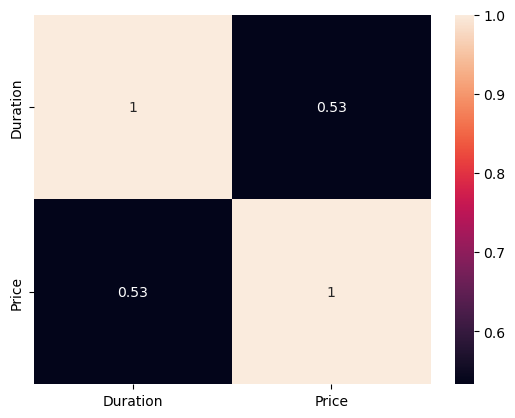

In [89]:
ax = sns.heatmap(planes.corr(numeric_only = True), annot=True)

In [90]:
planes['Total_Stops'] = planes['Total_Stops'].astype(int)

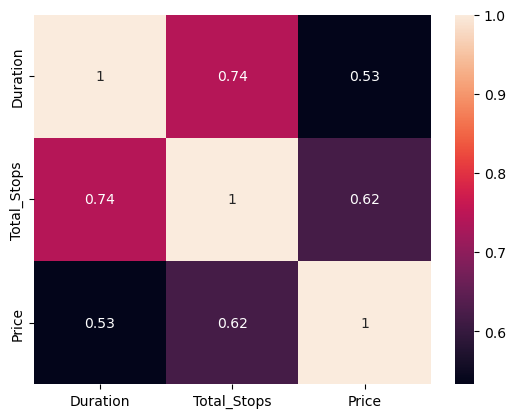

In [91]:
ax = sns.heatmap(planes.corr(numeric_only = True), annot=True)

In [92]:
print(planes.dtypes)

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                  float64
Total_Stops                 int32
Additional_Info            object
Price                     float64
dtype: object


In [93]:
planes['month'] = planes['Date_of_Journey'].dt.month
planes['weekday'] = planes['Date_of_Journey'].dt.weekday
print(planes[['month', 'weekday', 'Date_of_Journey']].head())

   month  weekday Date_of_Journey
0      6        6      2019-06-09
1      5        6      2019-05-12
2      3        4      2019-03-01
3      6        0      2019-06-24
4      3        1      2019-03-12


In [94]:
planes['Dep_Time'] = pd.to_datetime(planes['Dep_Time'], format='mixed')
planes['Arrival_Time'] = pd.to_datetime(planes['Arrival_Time'], format='mixed')
print(planes.dtypes)

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                  float64
Total_Stops                 int32
Additional_Info            object
Price                     float64
month                       int32
weekday                     int32
dtype: object


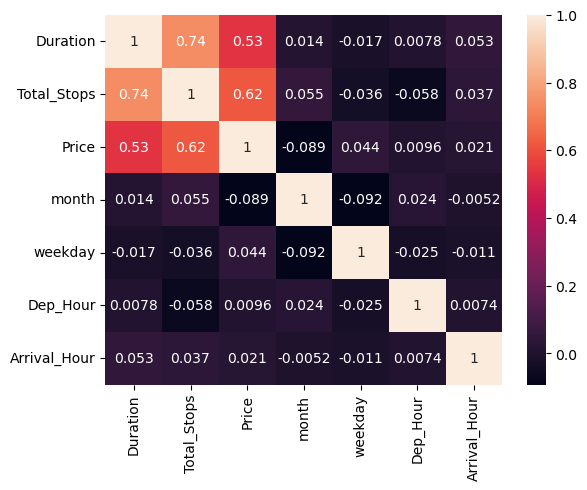

In [95]:

planes['Dep_Hour'] = planes['Dep_Time'].dt.hour
planes['Arrival_Hour'] = planes['Arrival_Time'].dt.hour
sns.heatmap(planes.corr(numeric_only = True), annot = True)#, cmap="Greys")
plt.show()

In [96]:
#Creating new features with descriptive statistics.
print(planes['Price'].describe())

count     8508.000000
mean      9033.468441
std       4366.382574
min       1759.000000
25%       5228.000000
50%       8452.000000
75%      12242.000000
max      54826.000000
Name: Price, dtype: float64


In [97]:
twenty_fifth = planes['Price'].quantile(0.25)
median = planes['Price'].median()
seventy_fifth = planes['Price'].quantile(0.75)
maximum = planes['Price'].max()

In [98]:
labels = ['Economy','Premium Economy','Business Class','First Class']
bins = [0, twenty_fifth, median, seventy_fifth, maximum]
planes['Price_Category'] = pd.cut(planes['Price'], labels=labels,bins=bins)
print(planes[['Price', 'Price_Category']].head())

     Price   Price_Category
0  13882.0      First Class
1   6218.0  Premium Economy
2  13302.0      First Class
3   3873.0          Economy
4  11087.0   Business Class


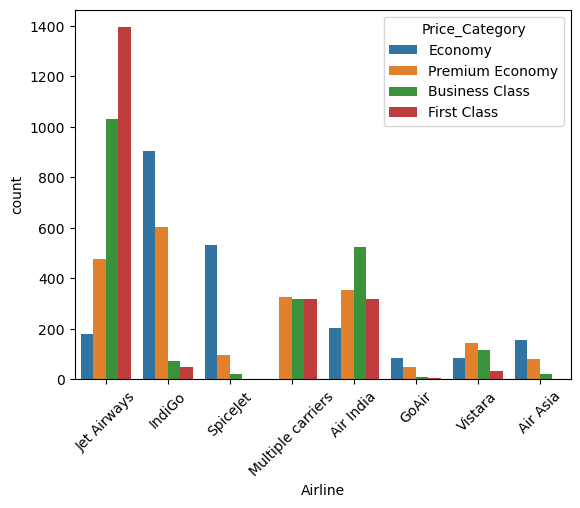

In [99]:
sns.countplot(data=planes, x='Airline', hue='Price_Category')
plt.xticks(rotation = 45)
plt.show()

In [107]:
salaries = pd.read_csv('Salaries_with_date_of_response.csv', index_col = 0, parse_dates=['date_of_response'],date_format = "%d/%m/%Y")
#print(salaries.info())
print(salaries.dtypes)
print(salaries.head())

Designation                     object
date_of_response        datetime64[ns]
Experience                      object
Employment_Status               object
Salary_In_Rupees               float64
Employee_Location               object
Company_Location                object
Company_Size                    object
Remote_Working_Ratio             int64
Salary_USD                     float64
Job_Category                    object
dtype: object
                  Designation date_of_response Experience Employment_Status  \
0  Machine Learning Scientist       2020-01-07         SE                FT   
1           Big Data Engineer       2020-09-19         SE                FT   
2        Product Data Analyst       2020-11-21         MI                FT   
3   Machine Learning Engineer       2020-11-29         SE                FT   
4                Data Analyst       2020-09-07         EN                FT   

   Salary_In_Rupees Employee_Location Company_Location Company_Size  \
0        20

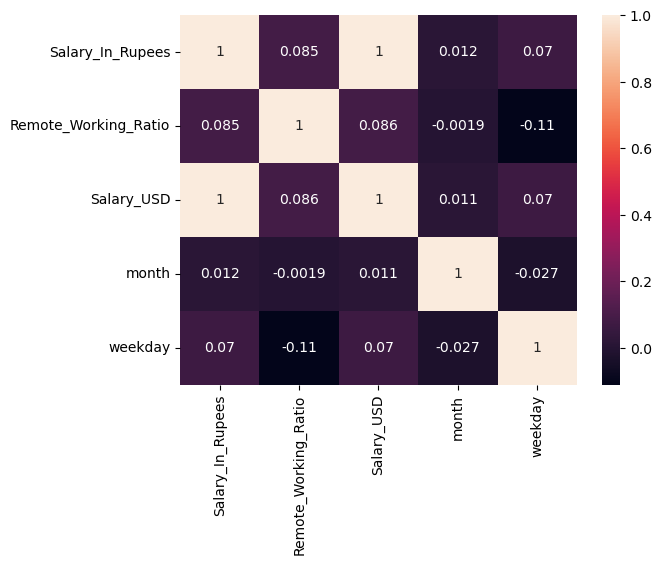

In [109]:
#Ex 9

# Get the month of the response
salaries["month"] = salaries["date_of_response"].dt.month

# Extract the weekday of the response
salaries["weekday"] = salaries["date_of_response"].dt.weekday

# Create a heatmap
sns.heatmap(salaries.corr(numeric_only = True), annot=True)
plt.show()

In [110]:
# Ex 10
# Find the 25th percentile
twenty_fifth = salaries["Salary_USD"].quantile(0.25)

# Save the median
salaries_median = salaries["Salary_USD"].median()

# Gather the 75th percentile
seventy_fifth = seventy_fifth = salaries["Salary_USD"].quantile(0.75)
print(twenty_fifth, salaries_median, seventy_fifth)

60880.691999999995 97488.552 143225.1


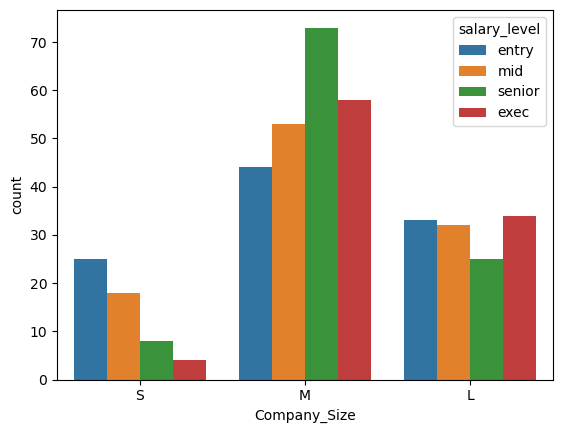

In [111]:
# Create salary labels
salary_labels = ["entry", "mid", "senior", "exec"]

# Create the salary ranges list
salary_ranges = [0, twenty_fifth, salaries_median, seventy_fifth, salaries["Salary_USD"].max()]

# Create salary_level
salaries["salary_level"] = pd.cut(salaries["Salary_USD"],
                                  bins=salary_ranges,
                                  labels=salary_labels)

# Plot the count of salary levels at companies of different sizes
sns.countplot(data=salaries, x="Company_Size", hue="salary_level")
plt.show()

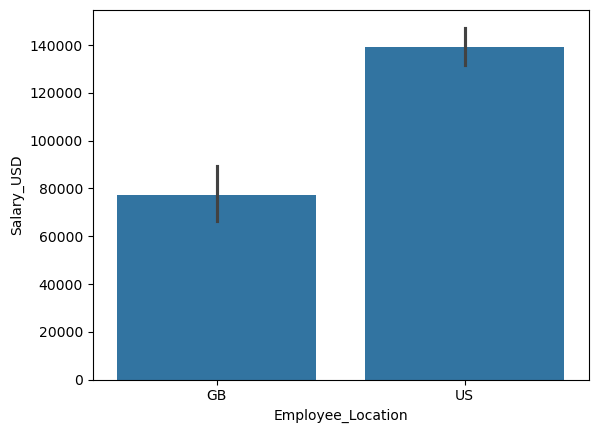

In [112]:
# Ex 11
# Filter for employees in the US or GB
usa_and_gb = salaries[salaries["Employee_Location"].isin(["US", "GB"])]

# Create a barplot of salaries by location
sns.barplot(data=usa_and_gb,x="Employee_Location", y="Salary_USD" )
plt.show()

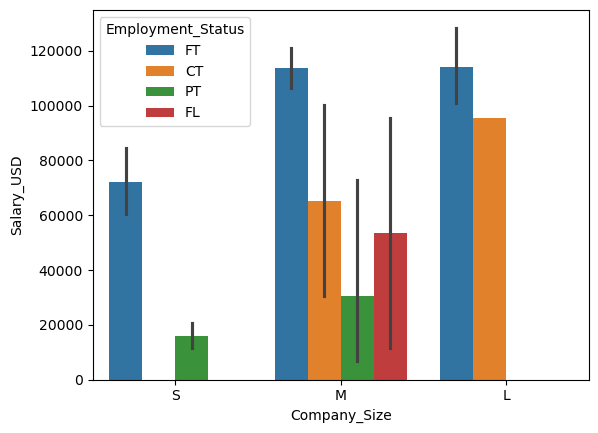

In [113]:
# Create a bar plot of salary versus company size, factoring in employment status
sns.barplot(data=salaries, y="Salary_USD", x="Company_Size", hue="Employment_Status")
plt.show()

In [1]:
import scipy

print(scipy.__version__)

1.3.2


In [47]:
print(pd.__version__)

1.3.5


In [48]:
pip show pandas


Name: pandas
Version: 1.3.5
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: c:\users\thumt\anaconda3\lib\site-packages
Requires: python-dateutil, numpy, pytz
Required-by: statsmodels, seaborn
Note: you may need to restart the kernel to use updated packages.
